In [2]:
import pandas as pd
import numpy as np
import os
import warnings 
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/HMFMOLD.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [11]:
# esg 등급표 불러오기
df = pd.read_csv("../data/esg 등급/2011_2022_ESGdata")
df.head(5)
# df.info()

,기업명,종합등급,환경,사회,지배구조,연도,기업코드
0,AJ네트웍스,B,D,B,B,2022,095570
1,AK홀딩스,B+,B,B+,B+,2022,006840
2,BGF,A,A,A+,A,2022,027410
3,BGF리테일,A,A,A+,A,2022,282330
4,BNK금융지주,A+,A,A+,A+,2022,138930


In [13]:
# 11년부터 연속으로 있는 기업 목록 가져오기
from_11 = pd.read_csv("../data/esg 등급/from_11.csv")
from_11

,0
0,AK홀딩스
1,BYC
2,CJ
3,CJ CGV
4,CJ대한통운
...,...
494,환인제약
495,황금에스티
496,효성
497,효성 ITX


In [15]:
# 수익률 가져오기
e_df = pd.read_csv("../data/회사수익률.csv")
e_df.head(5)

,year,수익률,종목명
0,2015,NaN,AJ네트웍스
1,2016,-16.696604,AJ네트웍스
2,2017,-5.305182,AJ네트웍스
3,2018,-10.580189,AJ네트웍스
4,2019,-19.419833,AJ네트웍스


In [16]:
e_df = e_df[~(e_df["수익률"] > 200)]
# e_df.isna().sum()
e_df["수익률"].fillna(0, inplace = True)


In [17]:
# 가로로 정렬
e_df_c = pd.DataFrame(index = e_df["종목명"].unique())
e_total=[]
for i in range(2011, 2023):
    e_lst = [np.nan] * len(e_df_c)
    for name, val in zip(e_df[e_df["year"] == i]["종목명"],e_df[e_df["year"] == i]["수익률"]):
        index = list(e_df_c.index).index(name)
        e_lst[index] = val
    e_total.append(e_lst)

for i in range(len(e_total)):
    e_df_c[i+2011] = e_total[i]

In [18]:
e_df_c.isna().sum()

2011    53
2012    50
2013    44
2014    35
2015    29
2016     6
2017     3
2018     7
2019     0
2020     3
2021     6
2022     0
dtype: int64

In [19]:
e_df_c.fillna(0, inplace = True)

In [20]:
# 다음 해와 수익률 차이
e_df_m = pd.DataFrame(index = e_df["종목명"].unique())
total_lst = []
for i in range(2011, 2020):
    total_lst.append(list(e_df_c[i+1] - e_df_c[i]))
total_lst
for i in range(len(total_lst)):
    e_df_m[f"{i+11}-{i+12}"] = total_lst[i]
e_df_m

,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20
AJ네트웍스,0.000000,0.000000,0.000000,0.000000,-16.696604,11.391422,-5.275006,-8.839645,-3.021619
AK홀딩스,-55.375683,99.033674,-7.246477,-57.417771,-68.777225,37.105361,-0.726699,-44.635825,-12.440418
BGF,0.000000,0.000000,0.000000,124.684264,-95.817236,-31.116393,-76.513680,42.351745,0.261637
BNK금융지주,-8.937456,32.008260,-16.410757,-18.559009,-21.911652,43.655292,-14.961888,-17.834503,0.490313
BYC,2.812813,2.686959,8.178405,27.373144,-16.254763,-57.902431,0.409846,13.629532,4.413730
...,...,...,...,...,...,...,...,...,...
환인제약,5.204981,59.941049,-18.080364,-15.026633,-54.057184,38.517689,1.509598,-34.977955,5.757566
황금에스티,-18.080618,25.194016,41.737348,-36.551070,22.895714,11.094767,-23.273520,-31.820646,-3.706033
효성 ITX,20.645772,25.413638,-21.986579,6.473558,-27.871611,31.347744,-26.322016,10.506084,86.498158
효성,-8.273664,29.665119,3.954463,46.572326,-39.539856,-5.346309,-35.534687,55.251673,-39.180594


In [21]:
e_df[e_df["year"] == 2012][["수익률"]] - e_df[e_df["year"] == 2011][["수익률"]].iloc[100]


,수익률
10,-4.539586
31,-18.982841
44,0.881315
57,-6.517890
70,1.338077
...,...
7924,-7.278802
7937,-38.751070
7950,-13.472443
7963,-33.370045


In [22]:
# 연속으로 있는 기업만 남기기
df = df[df["기업명"].isin(from_11["0"].values)]
df

,기업명,종합등급,환경,사회,지배구조,연도,기업코드
1,AK홀딩스,B+,B,B+,B+,2022,006840
5,BYC,B,D,B,B+,2022,001460
6,CJ,A,B+,A+,A,2022,001040
7,CJ CGV,A,B,A,A,2022,079160
8,CJ대한통운,A,A,A+,A,2022,000120
...,...,...,...,...,...,...,...
8729,풍산,B,B+,B,B+,2011,103140
8730,풍산홀딩스,B,B,B,E,2011,005810
8732,하나금융지주,B+,A+,B+,B,2011,086790
8734,서연,B,B,B,B,2018,007860


In [23]:
score_df = pd.DataFrame(index = from_11["0"].values)

In [24]:
# 연도별 종합등급에 따라 점수리스트 생성
total_score_lst = []
for i in range(2011, 2022):
    score_lst = [np.nan] * len(from_11["0"].values)
    for val, name in zip(df[df["연도"] == i]["종합등급"].values, df[df["연도"] == i]["기업명"].values):
        index = list(score_df.index).index(name)
        if val == "A+" :
            score_lst[index] = 6 
        elif val == "A" : 
            score_lst[index] = 5
        elif val == "B+" : 
            score_lst[index] = 4
        elif val == "B" : 
            score_lst[index] = 3
        elif val == "C" : 
            score_lst[index] = 2
        elif val == "D" : 
            score_lst[index] = 1
        elif val == "E" : 
            score_lst[index] = 0
    total_score_lst.append(score_lst)
print(total_score_lst[0])

[3, 3, 3, 3, 4, 0, 4, 0, 3, 3, 5, 3, 3, 3, 3, 0, 4, 0, 5, 3, 3, 3, 6, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 4, 5, 3, 5, 5, 5, 3, 3, 0, 4, 4, 0, 0, 5, 5, 0, 3, 3, 3, 3, 5, 3, 6, 4, 5, 4, 6, 6, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 4, 4, 3, 3, 3, 3, 3, 3, 0, 0, 5, 3, 3, 4, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 4, 3, 4, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 4, 3, 3, 5, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 5, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 6, 3, 3, 3, 4, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 4, 3, 3, 0, 6, 0, 6, 4, 6, 5, 3, 3, 5, 3, 4, 5, 0, 3, 0, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 0, 0, 5, 0, 3, 3, 4, 3, 0, 3, 3, 3, 4, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 4, 0, 3, 3, 3, 3, 0, 0, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 

In [25]:
# 연속으로 있는 기업명으로 비어있는 DataFrame 만들기
score_df = pd.DataFrame(index = from_11["0"].values)
# 기업명과 매치시켜서 DataFrame concat시키기
for i,val in enumerate(total_score_lst):
    score_df[i + 2011] = val
score_df.reset_index(drop=False,inplace = True)
score_df.tail(5)

,index,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
494,환인제약,3,3,3,3,3,3,3,3,3,3,3
495,황금에스티,3,3,3,3,3,3,3,3,1,1,2
496,효성,3,4,4,3,3,3,3,3,2,5,5
497,효성 ITX,3,0,3,3,3,3,3,3,3,4,4
498,후성,3,3,3,3,3,3,3,3,3,2,4


In [26]:
# 전년도와 비교해 종합등급의 등락 비교
total_lst = []
for i in range(2011, 2021):
    lst = []
    for j in score_df.index:
        lst.append(score_df.loc[j,i + 1] - score_df.loc[j,i])
    total_lst.append(lst)
print(total_lst[0])

[0, 0, 0, 0, -1, 3, 0, 0, 0, -3, -1, 0, 0, 0, 0, 3, -4, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 3, 0, 0, 0, 1, 0, 0, -2, 0, 0, 0, -1, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 3, 3, -1, -1, 0, 0, 0, 0, 0, 0, 3, 3, -1, 0, 0, -1, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, -3, 0, 0, 3, 3, 0, 0, 3, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, -3, 3, 3, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, -1, 2, 1, -1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, -3, 3, 3, 0, -3, -1, 0, 0, 3, -1, 3, -1, 0, 0, 0, -3, 1, 0, -3, -1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 3, -3, 1, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, -3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0

In [27]:
# 기업명과 매치시켜서 DataFrame concat시키기
up_down_df = pd.DataFrame(index = from_11["0"].values)
for i,val in enumerate(total_lst):
    up_down_df[f"{i + 11}-{i+12}"] = val
up_down_df.reset_index(drop=False,inplace = True)
up_down_df.tail(5)

,index,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21
494,환인제약,0,0,0,0,0,0,0,0,0,0
495,황금에스티,0,0,0,0,0,0,0,-2,0,1
496,효성,1,0,-1,0,0,0,0,-1,3,0
497,효성 ITX,-3,3,0,0,0,0,0,0,1,0
498,후성,0,0,0,0,0,0,0,0,-1,2


In [28]:
# 수익률 데이터에 없는 기업 제외
up_down_df = up_down_df[up_down_df["index"].isin(e_df[e_df["year"]==2011]["종목명"].values)]
up_down_df.reset_index(drop=True, inplace=True)
up_down_df

,index,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21
0,AK홀딩스,0,0,0,0,0,0,0,0,1,0
1,BYC,0,0,0,0,0,0,0,0,0,0
2,CJ,0,1,0,0,0,1,0,0,0,0
3,CJ CGV,0,0,0,0,0,0,1,0,1,0
4,CJ대한통운,-1,1,0,0,1,-1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
490,환인제약,0,0,0,0,0,0,0,0,0,0
491,황금에스티,0,0,0,0,0,0,0,-2,0,1
492,효성,1,0,-1,0,0,0,0,-1,3,0
493,효성 ITX,-3,3,0,0,0,0,0,0,1,0


## 20-21 ESG 등급 변화와 수익률 변화

In [29]:
# 2020 ~ 2021 데이터
mat_df = pd.DataFrame(index = up_down_df["index"])
mat_df["변동"] = list(up_down_df["20-21"])

In [30]:
# 시각화할 2011-2012 esg등급변화와 2011의 수익률 데이터 붙이기
lst = []
for name in up_down_df["index"].values:
    lst.append(e_df_m.loc[name,"11-12"])
mat_df["수익률"] = lst

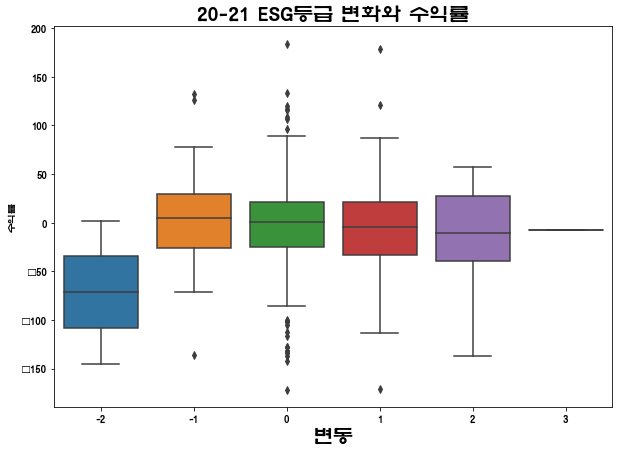

In [31]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)
plt.title("20-21 ESG등급 변화와 수익률", size = 20)
plt.xlabel("ESG점수", size = 20)
plt.xlabel("수익률", size = 20)
sns.boxplot(x = "변동", y = "수익률", data = mat_df);

In [32]:
# # 모든 등급 변화의 합
# lst = []
# for i in up_down_df.index:
#     total = 0
#     for j in range(1,len(up_down_df.columns)):
#         total += up_down_df.iloc[i,j]
#     lst.append(total)
# mat_df["변동"] = lst

In [33]:
# e_df_m.loc["삼성전자"].values

In [34]:
# # 모든 수익률의 합
# lst = []
# for name in up_down_df["index"].values:
#     total = 0
#     for val in e_df_m.loc[name].values:
#         total += val
#     lst.append(val)
# mat_df["수익률"] = lst

In [35]:
# plt.title("11-21 ESG등급 변화와 수익률", size = 20)
# plt.xlabel("ESG점수", size = 20)
# plt.xlabel("수익률", size = 20)
# sns.boxplot(x = "변동", y = "수익률", data = mat_df)

In [40]:
score_df = score_df[score_df["index"].isin(e_df[e_df["year"]==2011]["종목명"].values)]

In [43]:
# 2020 ~ 2021 데이터
mat_df = pd.DataFrame(index = up_down_df["index"])
mat_df["ESG점수"] = list(score_df[2011])

In [44]:
# 시각화할 2011-2012 esg등급변화와 2011의 수익률 데이터 붙이기
lst = []
for name in score_df["index"].values:
    lst.append(e_df_m.loc[name,"11-12"])
mat_df["수익률"] = lst

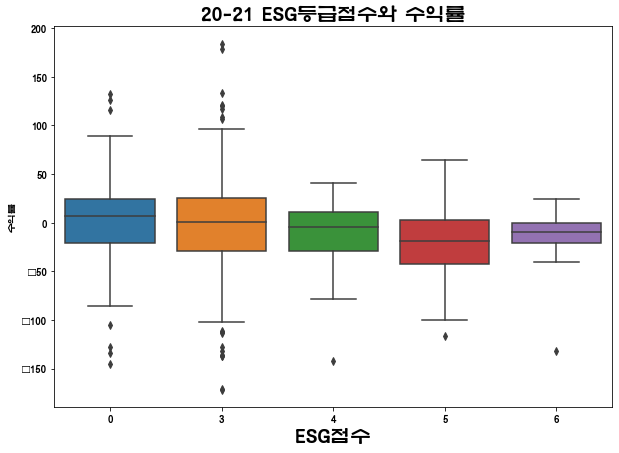

In [47]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)
plt.title("20-21 ESG등급점수와 수익률", size = 20)
plt.xlabel("ESG점수", size = 20)
plt.xlabel("수익률", size = 20)
sns.boxplot(x = "ESG점수", y = "수익률", data = mat_df);

In [50]:
t_df = pd.read_csv("../data/tobinq.csv").columns = {"종목명", "연도","tobinQ"}


In [51]:
t_df

{'tobinQ', '연도', '종목명'}